In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
plt.style.use('dark_background')

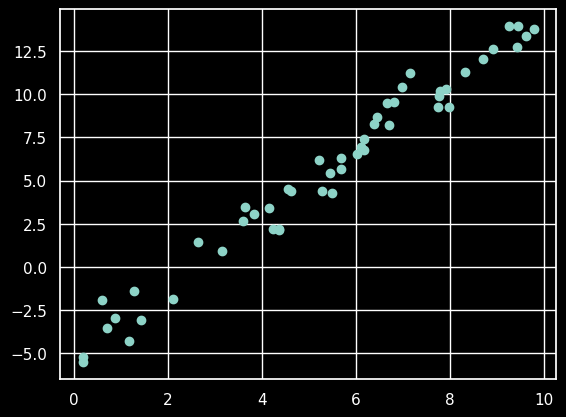

In [5]:
# Let's start with the most familiar linear regression, a straight-line fit to
# data. A straigh-line fit is a model of the form y = ax + b where -a- is 
# commonly known as the slope, and -b- is commonly known as the intercept.
rng = np.random.RandomState(0)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

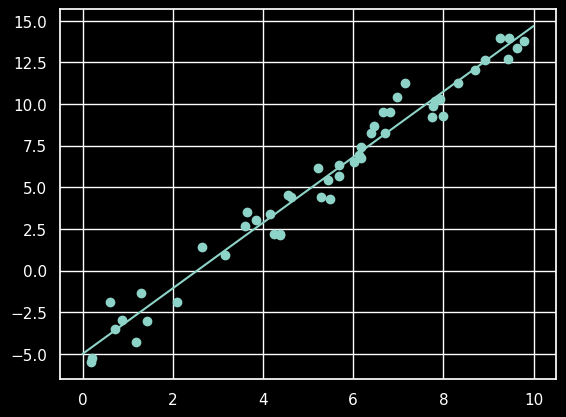

In [6]:
# We can use Scikit-Learn's LinearRegression estimator to fit this data and 
# construct the best-fit line. 
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit);

In [7]:
# The slope and intercept of the data are contained in the model's fit
# parameters, which in Scikit-Learn are always marked by a trailing underscore.
print(f"Model slope: {model.coef_[0]}", f"Model intercept: {model.intercept_}", sep = "\n")


Model slope: 1.9692732947309528
Model intercept: -5.0072100841302785


In [8]:
# The LinearRegression estimator is much more capable than this, however,
# in addition to simple straight-line fits, it can also handle 
# multidimensional linear models of the form 
# y = a_0 + a_1*x_1 + a_2*x_2 + ... + a_n*x_n
# where there are multiple x values. Geometrically, this is akin to fitting a 
# plane to points in three dimensions, or fitting a hyper-plane to points in
# higher dimensions.
# The multidimensional nature of such regressions makes them more difficoult
# to visualize, but we can see one of these fits in action by building some
# example data, using numpy's multiplication operator.
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., -1.])
model.fit(X, y)
#print(model.intercept_)
#print(model.coef_)

LinearRegression()

In [9]:
# BASIS FUNCTION REGRESSION
# One trick you can use to adapt linear regression to nonlinear relationships 
# between variables is to transform the data according to basis functions.
# The idea is to take our multidimensional linear model y = a_0 + a_1*x_1 +
# a_2*x_2 + ... + a_n*x_n and build the x_1, x_2, ... , x_n from our
# singe-dimensional input x. That is, we let x_n = f_n(x), where f_n() is some
# function that transforms our data. For example, if f_n(x) = x^n, our model 
# becomes a POLYNOMIAL REGRESSION y = a_0 + a_1*x + a_2*x^2 + ... + a_n*x^n.
# NOTE that this is still a LINEAR MODEL, the linearity refers to the fact that
# the coefficients a_n never multiply or divide each other. What we have
# effectively done is taken our one-dimensional x values and projected them 
# into a higher dimension, so that a linear fit can fit more complicated 
# relationships between x and y.

In [10]:
# POLYNOMIAL BASIS FUNCTIONS.
# This polynomial projection is useful enough that it is built into
# scikit-learn, using the PolynomialFeatures transformer.
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias = False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [11]:
# We see here that the transformer has converted our one-dimensional array 
# into a three-dimensional array by taking the exponent of each value. This
# new, higher-dimensional data representation can then be plugged into a
# linear regression. The cleanest way to accomplish this is to use a pipeline.
# Let's make a 7th degree polynomial model in this way:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7), 
                          LinearRegression())

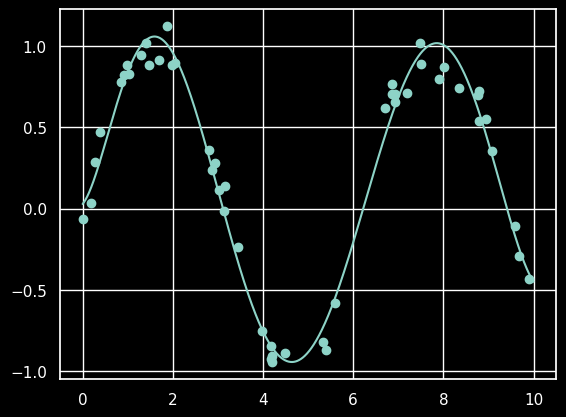

In [13]:
# With this transform in place, we can use the linear model to fit much more 
# complicated relationships between x and y. For example, here is a sine wave 
# with noise.
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + .1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit);